# The applications of linear algebra on Recommender systems

## Setup

### Build

In [1]:
# !just build

### Modules

In [2]:
# Our module
import alglin_python as alin

# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt

# Other
import os
import tarfile
import urllib.request


### Dowloading the dataset

In [3]:
# Helper function to download and extract a file
def download_and_extract(url, target_folder=None):
    """ Downloads a file from a given URL and extracts it if necessary. """
    # Extract file name from URL
    file_name = os.path.basename(url)
    
    # Determine extraction folder name
    if target_folder is None:
        target_folder = os.path.splitext(file_name)[0]
    
    # Check if the file is already downloaded
    if not os.path.exists(file_name):
        print(f"Downloading {file_name}...")
        urllib.request.urlretrieve(url, file_name)
        print(f"Downloaded {file_name}.")
    else:
        print(f"{file_name} already exists, skipping download.")
    
    # Check if the folder is already extracted
    if not os.path.exists(target_folder):
        print(f"Extracting {file_name}...")
        with tarfile.open(file_name, "r:gz") as tar:
            tar.extractall()
        print(f"Extraction completed.")
    else:
        print(f"{target_folder} already exists, skipping extraction.")


# Download and extract the dataset
dataset_url = "https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz"

download_and_extract(dataset_url)


Downloaded ml-20m-compact.tar.gz.
Extracting ml-20m-compact.tar.gz...
Extraction completed.


In [4]:
# If the download is not working, you can try this:
# !python3 -m wget https://github.com/mmanzato/MBABigData/raw/master/ml-20m-compact.tar.gz
# !tar -xvzf ml-20m-compact.tar.gz

### Loading the dataset

In [5]:
pd.read_csv('./dataset/movies_sample.csv')

,movieId,title,genres
0,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
1,31,Dangerous Minds (1995),Drama
2,37,Across the Sea of Time (1995),Documentary|IMAX
3,161,Crimson Tide (1995),Drama|Thriller|War
4,193,Showgirls (1995),Drama
...,...,...,...
428,129857,Bright Days Ahead (2013),Drama|Romance
429,130344,Coast of Death (2013),Children|Documentary|Drama
430,130408,A Rumor Of War (1980),(no genres listed)
431,130510,Berserk: The Golden Age Arc 3 - Descent (2013),Action|Animation|Fantasy


In [6]:
pd.read_csv('./dataset/ratings_sample.csv')

,userId,movieId,rating,timestamp
0,11,7481,5.0,1230788624
1,11,1046,4.5,1251144145
2,11,616,4.0,1230782542
3,11,3535,2.0,1230784884
4,11,5669,5.0,1230853788
...,...,...,...,...
190616,138493,288,5.0,1255808026
190617,138493,1748,5.0,1255805576
190618,138493,616,4.0,1256750556
190619,138493,1597,4.5,1255817426


In [7]:
# Loading data
movies_df = pd.read_csv('./dataset/movies_sample.csv')
ratings_df = pd.read_csv('./dataset/ratings_sample.csv')

# Extract unique users and movies
all_users = ratings_df['userId'].unique()
all_movies = pd.concat([ratings_df['movieId'], movies_df['movieId']]).unique()

# Mapping users and movies to indices
map_users = {user: idx for idx, user in enumerate(all_users)}
map_items = {item: idx for idx, item in enumerate(all_movies)}

# Apply the mappings directly
ratings_df['userId'] = ratings_df['userId'].map(map_users)
ratings_df['movieId'] = ratings_df['movieId'].map(map_items)
movies_df['movieId'] = movies_df['movieId'].map(map_items)

# Drop unnecessary columns
movies_df = movies_df.drop(columns=['title'])

# Prepare mapped arrays for future use
all_movies = np.arange(len(all_movies))  # Mapped movie IDs
all_users = np.arange(len(all_users))   # Mapped user IDs

## Exploration

In [8]:
movies_df.head()

,movieId,genres
0,49,Crime|Drama
1,61,Drama
2,125,Documentary|IMAX
3,23,Drama|Thriller|War
4,56,Drama


In [9]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,0,0,5.0,1230788624
1,0,1,4.5,1251144145
2,0,2,4.0,1230782542
3,0,3,2.0,1230784884
4,0,4,5.0,1230853788


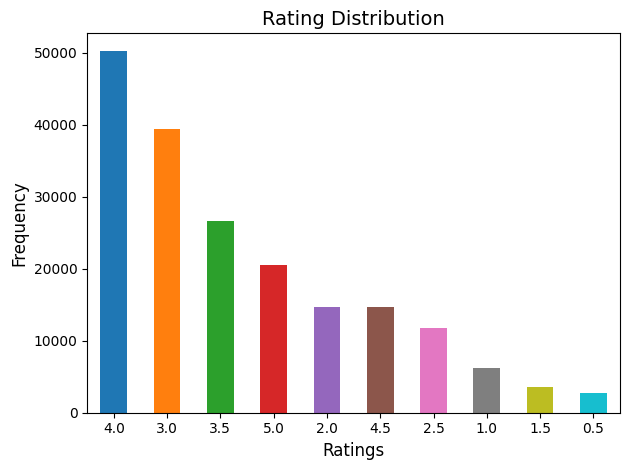

In [10]:
def plot_rating_distribution(ratings, column_name = 'rating'):
    """ Plots the distribution of ratings in a specified column. """

    # Calculate value counts
    value_counts = ratings[column_name].value_counts()
    
    # Create a bar plot with dynamic colors
    value_counts.plot(kind='bar', color=plt.cm.tab10.colors[:len(value_counts)])
    
    # Add title and axis labels
    plt.title('Rating Distribution', fontsize=14)
    plt.xlabel('Ratings', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Improve layout and readability
    plt.xticks(rotation=0, fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    
    # Display the plot
    plt.show()

plot_rating_distribution(ratings_df)

### Train-Test split